In [2]:
#Importando a biblioteca 
import pandas as pd

In [4]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [5]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [12]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
140,Salvador,2019-03-02,20.79,1036,2
21,Aracaju,2018-01-01,37.36,1520,2
158,Natal,2019-01-02,183.64,1037,3
136,Natal,2019-01-02,13.81,1036,1
99,Salvador,2019-01-01,40.38,1037,1


In [9]:
#verificando os tipod de dados
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [13]:
#alterando o tipo de dado da coluna lojaID
df["LojaID"] = df["LojaID"].astype("object")

In [14]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [15]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [16]:
#consultando linahs com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [17]:
#subtituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [18]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#apagando as linhas com valores nulos
df.dropna(inplace=True) 

In [ ]:
#apagando as linhas com valores nulos com base em apenas em 1 coluna 
df.dropna(subset=["Vendas"],inplace=True)

In [ ]:
#Removendo linahs que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

In [19]:
#criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [21]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [22]:
#Retornando a maior receita 
df["Receita"].max()

3544.0

In [23]:
#Retornando a menor receita 
df["Receita"].min()

3.34

In [24]:
#nlargest
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [25]:
#nsamllest
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [26]:
#agrupamento pro cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [27]:
#Ordenando o conjunto de dados 
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


**TRABALHDNO COM DATAS **

In [28]:
#TRANFORMANDO A COLUNA DE DATA EM TIPO INTEIRO
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [30]:
#verificando o tipo de dado de cada coluna
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [31]:
#transforamando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [32]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [33]:
#agrupamento ór ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [34]:
#criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [37]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
125,Salvador,2019-03-02,25.00,1037,2,50.00,2019
84,Fortaleza,2019-01-01,147.46,1003,6,884.76,2019
50,Salvador,2019-01-01,44.87,1036,3,134.61,2019
9,Natal,2018-05-02,261.00,852,3,783.00,2018
75,Recife,2019-01-01,170.29,981,8,1362.32,2019


In [39]:
#extraindo o mes e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
56,Salvador,2019-01-01,178.44,1035,3,535.32,2019,1,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2
2,Fortaleza,2019-02-10,35.33,1004,3,105.99,2019,2,10
121,Aracaju,2018-01-01,162.07,1520,3,486.21,2018,1,1
41,Natal,2018-05-20,835.00,852,4,3340.00,2018,5,20


In [41]:
#retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [42]:
#Calculando a diferença de dias
df["diferenca_dia"] = df["Data"] - df["Data"].min()

In [43]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dia
106,Natal,2019-01-02,149.19,1035,2,298.38,2019,1,2,366 days
58,Fortaleza,2019-01-01,38.90,1004,4,155.60,2019,1,1,365 days
12,Recife,2019-01-01,17.48,982,2,34.96,2019,1,1,365 days
15,Natal,2018-02-01,432.00,854,3,1296.00,2018,2,1,31 days
76,Natal,2019-02-20,364.00,853,2,728.00,2019,2,20,415 days


In [44]:
#criando a coluna de trimestre
df["trimestre"] = df["Data"].dt.quarter

In [49]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dia,trimestre
53,Natal,2019-02-14,290.00,854,4,1160.00,2019,2,14,409 days,1
165,Salvador,2019-01-02,11.54,1037,1,11.54,2019,1,2,366 days,1
33,Fortaleza,2019-01-01,19.56,1005,1,19.56,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019,1,1,365 days,1
110,Aracaju,2018-01-01,38.15,1520,4,152.60,2018,1,1,0 days,1


In [50]:
#filtrando as vendas de 2019 do mes de março
vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [52]:
vendas_marco_2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dia,trimestre
120,Salvador,2019-03-02,140.17,1036,2,280.34,2019,3,2,425 days,1
5,Natal,2019-03-30,674.00,854,2,1348.00,2019,3,30,453 days,1
134,Recife,2019-03-02,195.18,980,5,975.90,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Recife,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
122,Recife,2019-03-02,235.06,983,3,705.18,2019,3,2,425 days,1
130,Salvador,2019-03-02,59.78,1036,1,59.78,2019,3,2,425 days,1
137,Fortaleza,2019-03-02,51.99,983,3,155.97,2019,3,2,425 days,1
108,Recife,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
136,Fortaleza,2019-03-02,39.09,982,4,156.36,2019,3,2,425 days,1


 **VISUALIZANDO DADOS**

In [54]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

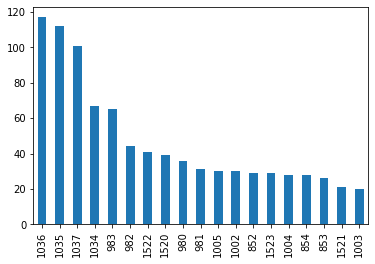

In [56]:
#graficos de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

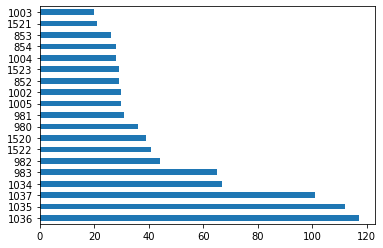

In [58]:
#grafico de barras horizontais
df["LojaID"].value_counts().plot.barh()

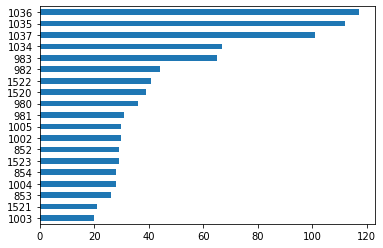

In [61]:
#grafico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

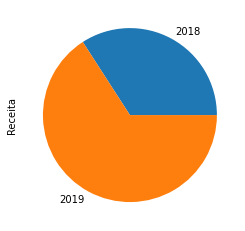

In [63]:
#grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [64]:

#total de venda por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

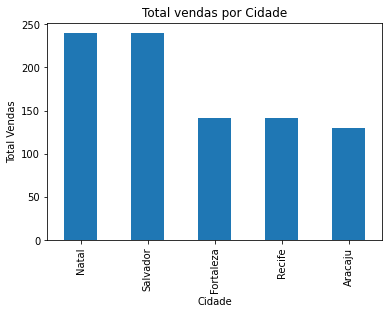

In [66]:
#adicionando um titulo e altrando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

Text(0, 0.5, 'Total Vendas')

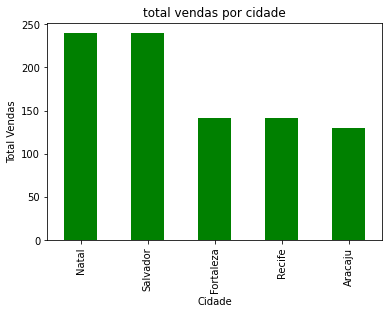

In [69]:
#altrando a cor
df["Cidade"].value_counts().plot.bar(title="total vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [71]:
#alterando o estilo 
plt.style.use("ggplot")

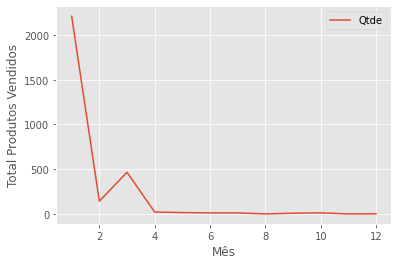

In [76]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total produtos vendidos por mês" )
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

In [78]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [79]:
#selecioanndo apenas as venda de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

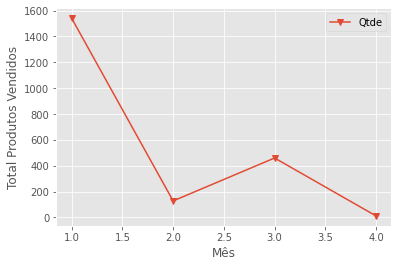

In [80]:
#total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend() 

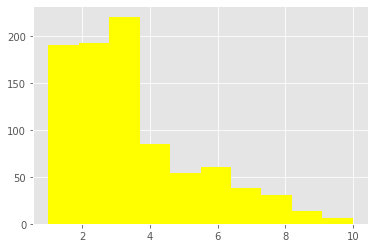

In [82]:
#misograma
plt.hist(df["Qtde"], color="yellow");

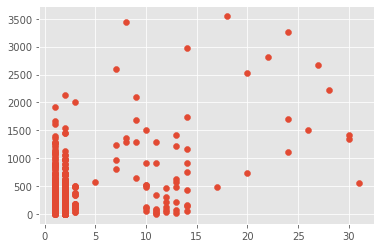

In [83]:
plt.scatter(x=df_2019["dia_venda"],y = df_2019["Receita"]);

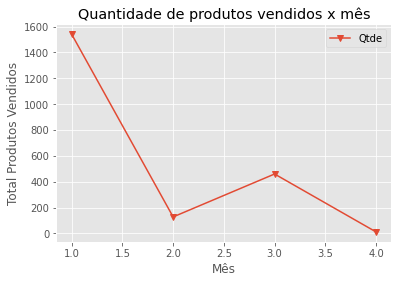

In [84]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")